# Setting up benchmark model and developing and tuning a DecisionTree Classifier

In this notebook, the yoghurt data with dummy variables is used to
- set up a benchmark model, based on a DummyClassifier
- build and tune a DecisionTree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data and remove irrelevant variables

In [2]:
data = pd.read_csv("../02_data_preparation/yoghurt_w_dummy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21251 entries, 0 to 21250
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 21251 non-null  int64  
 1   first_purchase             21251 non-null  bool   
 2   shelf_price                21251 non-null  float64
 3   pct_disc                   21251 non-null  float64
 4   pct_retail_disc            21251 non-null  float64
 5   pct_coupon_disc            21251 non-null  float64
 6   display_1                  21251 non-null  int64  
 7   display_2                  21251 non-null  int64  
 8   display_3                  21251 non-null  int64  
 9   display_4                  21251 non-null  int64  
 10  display_5                  21251 non-null  int64  
 11  display_6                  21251 non-null  int64  
 12  display_7                  21251 non-null  int64  
 13  display_9                  21251 non-null  int

In [3]:
data.drop(labels=["Unnamed: 0", "display_1", "display_5", "display_A", "campaign_6.0", "campaign_30.0", "description_TypeC"],
          axis = 1, inplace = True)

In [4]:
pd.set_option("display.max_columns", None)
data.describe(include = "all")

,first_purchase,shelf_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_2,display_3,display_4,display_6,display_7,display_9,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,marital_status_A,marital_status_B,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_19-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,income_100-124K,income_125-149K,income_15-24K,income_150-174K,income_175-199K,income_200-249K,income_25-34K,income_250K+,income_35-49K,income_50-74K,income_75-99K,income_Under 15K,hhsize_1,hhsize_2,hhsize_3,hhsize_4,hhsize_5+,campaign_8.0,campaign_13.0,campaign_18.0,campaign_29.0,description_TypeA,description_TypeB
count,21251,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.00000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.156933,0.158316,0.153330,0.004987,0.011152,0.007623,0.001082,0.005459,0.012046,0.004047,0.148699,0.001223,0.048751,0.008235,0.005270,0.488918,0.125406,0.686321,0.015152,0.005176,0.037834,0.061974,0.295092,0.314009,0.147711,0.122677,0.159240,0.098537,0.102254,0.63997,0.042727,0.211896,0.276975,0.347701,0.067009,0.053692,0.080420,0.074820,0.054586,0.085972,0.017646,0.006870,0.079384,0.017646,0.180086,0.224037,0.126394,0.052139,0.280975,0.374476,0.156746,0.089596,0.098207,0.076373,0.077879,0.075855,0.006776,0.230248,0.006776
std,NaN,1.104681,0.145841,0.137543,0.044610,0.105017,0.086979,0.032881,0.073682,0.109096,0.063488,0.355800,0.034958,0.215351,0.090374,0.072407,0.499889,0.331186,0.463999,0.122161,0.071761,0.190798,0.241113,0.456095,0.464131,0.354821,0.328073,0.365908,0.298046,0.302989,0.48002,0.202247,0.408661,0.447515,0.476252,0.250043,0.225413,0.271948,0.263107,0.227175,0.280330,0.131665,0.082604,0.270344,0.131665,0.384268,0.416956,0.332301,0.222312,0.449486,0.483999,0.363569,0.285609,0.297602,0.265600,0.267987,0.264773,0.082040,0.421001,0.082040
min,NaN,0.350000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.400000,0.

Importing modules and splitting data in test and train data 

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [6]:
X = data.drop("first_purchase", axis = 1)
y = data["first_purchase"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

## Set up dummy classifier as benchmark
The benchmark model reflects actual distribution of the target variable in te data

In [8]:
dummy_frequent = DummyClassifier(strategy = "most_frequent")
dummy_stratified = DummyClassifier(strategy = "stratified")

In [9]:
dummy_stratified.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [10]:
y_pred_str = dummy_stratified.predict(X_test)

In [11]:
#metrics for dummy classifier / stratified strategy
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_str))

0.33415233415233414
0.3363957597173145
0.3319386331938633
0.5537520583392143


## Build initial DecisionTree Classfier

The data has a certain structure based on households, products, and time during the observation period. In order to avoid the risk of systematic effects, StratifiedShuffleSplit is selected for cross-validation instead of StratifiedKFold.

In [16]:
cv = StratifiedShuffleSplit(n_splits = 5) 

In [17]:
from metrics import cross_val_scores, test_scores, train_scores

In [18]:
clf = DecisionTreeClassifier()

In [19]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
cross_val_scores(clf, X_train, y_train, cv)

0.5864553801071805
0.7105144061119922
0.5120418848167538
0.7658823529411765


In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
test_scores(clf, X_test, y_test)

0.6027722772277228
0.6975252062328139
0.5306834030683403
0.7640555163490943


In [23]:
train_scores(clf, X_train, y_train)

0.7611642743221689
0.8883201489064682
0.665852807813045
0.8590588235294118


## Hyperparameter tuning

We begin hyperparameter tuning with random search for a few key hyperparameters. However, this does not help improve the model.

In [19]:
import scipy

In [25]:
rand_params = {'max_depth': scipy.stats.randint(2,50), "min_samples_leaf": scipy.stats.randint(2,50), 
               "min_samples_split": scipy.stats.randint(4,100)}

In [26]:
rand_search = RandomizedSearchCV(clf, rand_params, n_iter=30, scoring = "f1", cv = cv)

In [27]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
                   estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E1527F9A00>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E14BDEF070>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E14BDE36A0>},
                   scoring='f1')

In [28]:
rand_search.best_score_

0.5755683200238301

In [29]:
rand_search.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=8)

## Validation with initial model

We proceed with the initial DecisionTree Classifier which already had quite okay scores.
Learning curve and validation curves show that the model is learning, but it also overfits.
Indications for improving the model are derived from cross validation curves.

In [30]:
from plotting import plot_learning_curve, plot_validation_curve

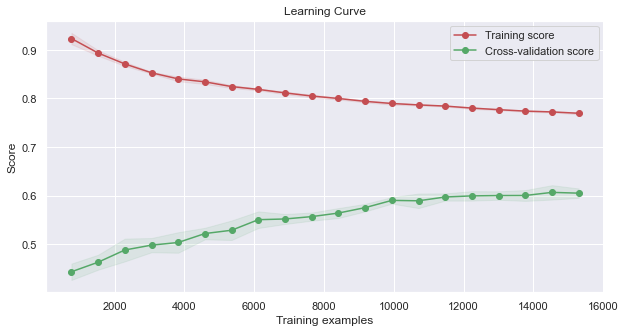

In [31]:
learning_curve = plot_learning_curve(clf, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(.05, 1, 20), scoring = "f1")           

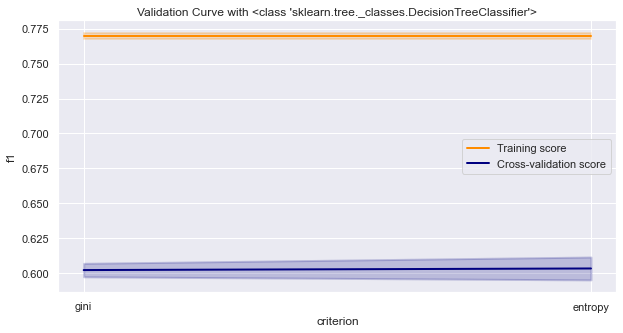

In [34]:
val_criterion = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="criterion", param_range = ["gini", "entropy", "log_loss"], scoring = "f1")

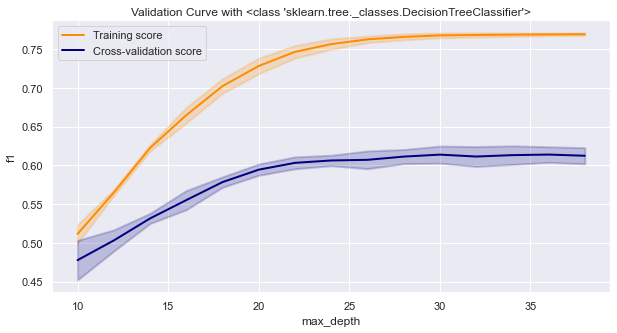

In [37]:
val_max_depth = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="max_depth", param_range = np.arange(10, 40, 2), scoring = "f1")

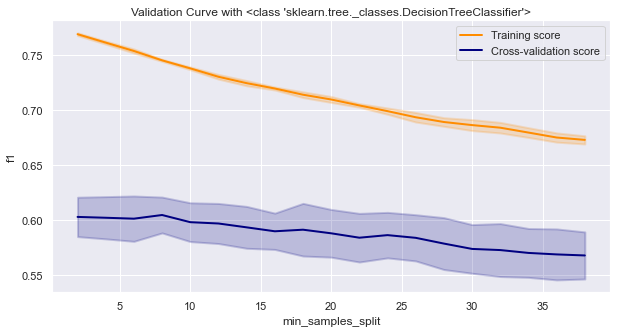

In [39]:
val_min_samples_split = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="min_samples_split", param_range = np.arange(2, 40, 2), scoring = "f1")

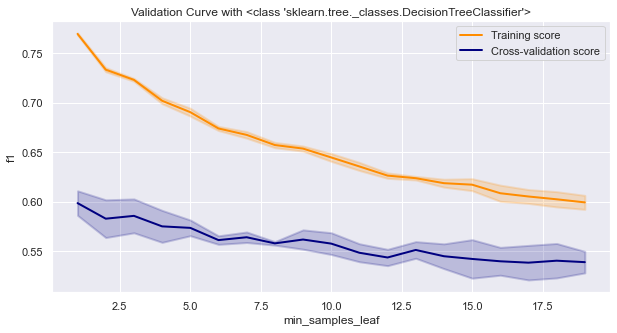

In [41]:
val_min_samples_leaf = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="min_samples_leaf", param_range = np.arange(1, 20, 1), scoring = "f1")

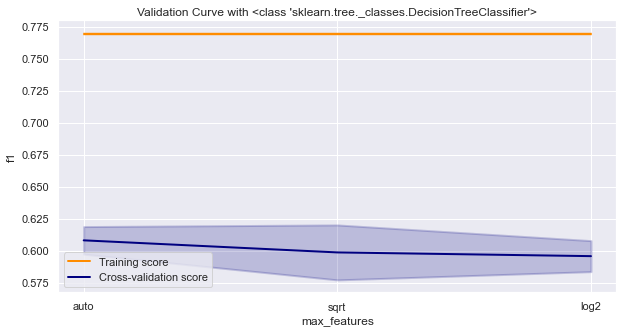

In [43]:
val_max_features = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="max_features", param_range = ["auto", "sqrt", "log2"], scoring = "f1")

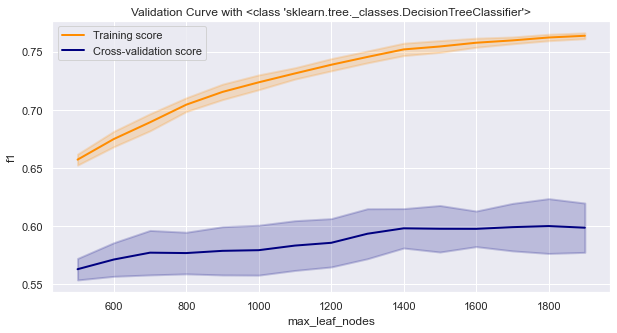

In [45]:
val_max_leaf_nodes = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="max_leaf_nodes", param_range = np.arange(500,2000,100), scoring = "f1")

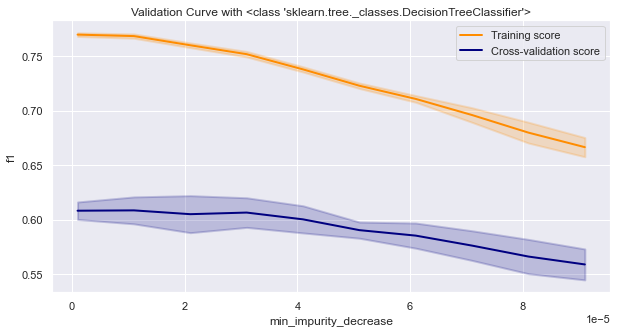

In [55]:
val_min_impurity_decrease = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="min_impurity_decrease", param_range = np.arange(0.000001, 0.0001,0.00001), scoring = "f1")

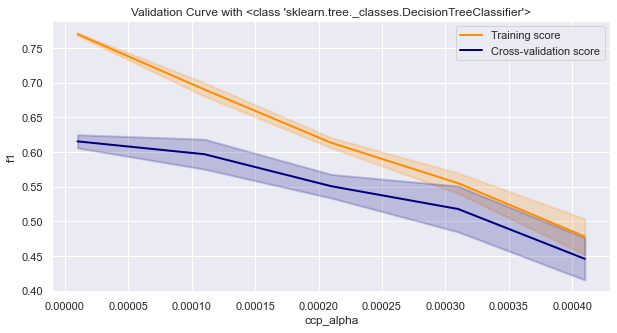

In [54]:
val_ccp_alpha = plot_validation_curve(clf, X_train, y_train, cv = cv, 
                                      param_name ="ccp_alpha", param_range = np.arange(0.00001, 0.0005,0.0001), scoring = "f1")

## Hyperparameter tuning 

Based on indications from crossvalidation curves, we define a new baseline model clf_balanced and a parameter grid for grid search.
This is implemented both with weighting (clf_balanced) and without weighting (intial model clf) the target variable.

In [24]:
clf_balanced = DecisionTreeClassifier(class_weight = "balanced")

In [25]:
clf_balanced.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [26]:
test_scores(clf_balanced, X_test, y_test)

0.6493679308050565
0.6208651399491094
0.6806136680613668
0.7520583392143025


In [60]:
param_grid = {"criterion": ["gini", "entropy"], "max_depth": [25, 28, 30], "min_samples_split": [4, 6, 8], "min_samples_leaf": [1, 3], 
              "min_impurity_decrease": [0.000001, 0.000002, 0.000003], "ccp_alpha": [0, 0.00001, 0.0005]}

In [62]:
grid_search = GridSearchCV(clf, param_grid= param_grid, scoring = "f1", cv = cv)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 1e-05, 0.0005],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 28, 30],
                         'min_impurity_decrease': [1e-06, 2e-06, 3e-06],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [4, 6, 8]},
             scoring='f1')

In [63]:
grid_search.best_score_

0.6114048017309115

In [64]:
grid_search.best_params_

{'ccp_alpha': 1e-05,
 'criterion': 'entropy',
 'max_depth': 30,
 'min_impurity_decrease': 1e-06,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [65]:
grid_search_balanced = GridSearchCV(clf_balanced, param_grid= param_grid, scoring = "f1", cv = cv)
grid_search_balanced.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'ccp_alpha': [0, 1e-05, 0.0005],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 28, 30],
                         'min_impurity_decrease': [1e-06, 2e-06, 3e-06],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [4, 6, 8]},
             scoring='f1')

In [66]:
grid_search_balanced.best_score_

0.644111524205788

In [67]:
grid_search_balanced.best_params_

{'ccp_alpha': 1e-05,
 'criterion': 'entropy',
 'max_depth': 25,
 'min_impurity_decrease': 3e-06,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

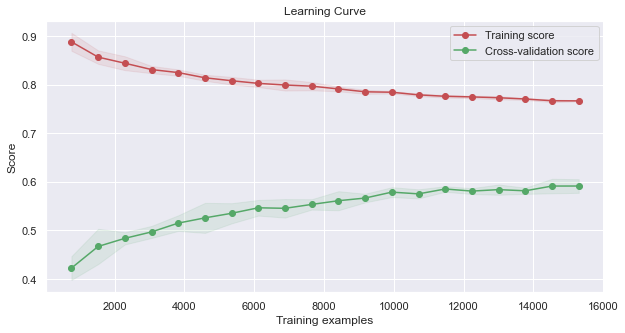

In [68]:
learning_curve = plot_learning_curve(grid_search.best_estimator_, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(.05, 1, 20), scoring = "f1")   

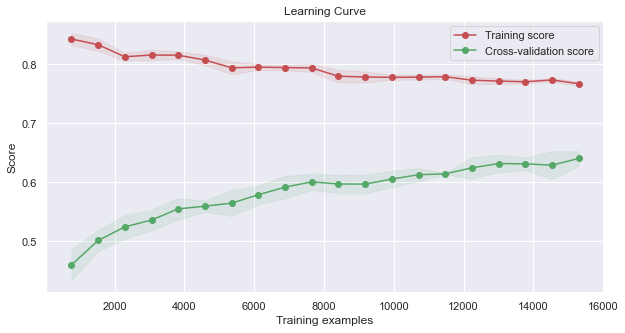

In [69]:
learning_curve = plot_learning_curve(grid_search_balanced.best_estimator_, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(.05, 1, 20), scoring = "f1")   

## Calculate model performance 
As with other algorithms
- the model with weighting of the target variable (fav_model_balanced) achieves a higher f1 score than without weighting (fav_model)
- precision is better without, recall with weighting

In [27]:
fav_model = DecisionTreeClassifier(ccp_alpha = 1e-05,  criterion = 'entropy',  max_depth= 30,  min_impurity_decrease = 1e-06, 
                                   min_samples_leaf= 1,  min_samples_split= 4)
fav_model_balanced = DecisionTreeClassifier(ccp_alpha= 1e-05,  criterion= 'entropy',  max_depth= 25,  min_impurity_decrease= 3e-06, 
                                            min_samples_leaf= 1,  min_samples_split= 6, class_weight = "balanced")
fav_model.fit(X_train, y_train)
fav_model_balanced.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=1e-05, class_weight='balanced',
                       criterion='entropy', max_depth=25,
                       min_impurity_decrease=3e-06, min_samples_split=6)

In [28]:
cross_val_scores(fav_model, X_train, y_train, cv)

0.6014839309192009
0.6831162409982642
0.5176265270506107
0.768


In [29]:
test_scores(fav_model, X_test, y_test)

0.5940988835725678
0.6936685288640596
0.5195258019525802
0.7605269348388615


In [30]:
train_scores(fav_model, X_train, y_train)

0.7480244073221965
0.8770818672296505
0.6520753400767353
0.8518235294117648


In [31]:
cross_val_scores(fav_model_balanced, X_train, y_train, cv)

0.6375252334280114
0.591550039802679
0.675392670157068
0.7331764705882352


In [32]:
test_scores(fav_model_balanced, X_test, y_test)

0.6420472951085195
0.5995160314579552
0.6910739191073919
0.7400611620795107


In [33]:
train_scores(fav_model_balanced, X_train, y_train)

0.7670431461769726
0.7180891525939449
0.8231600976630624
0.8313529411764706


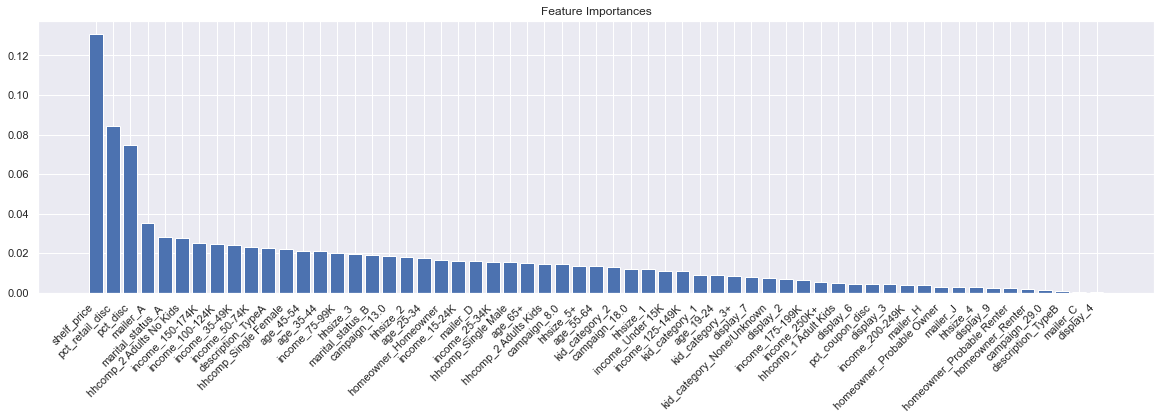

In [34]:
importances = fav_model.feature_importances_

indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [X.columns [i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');


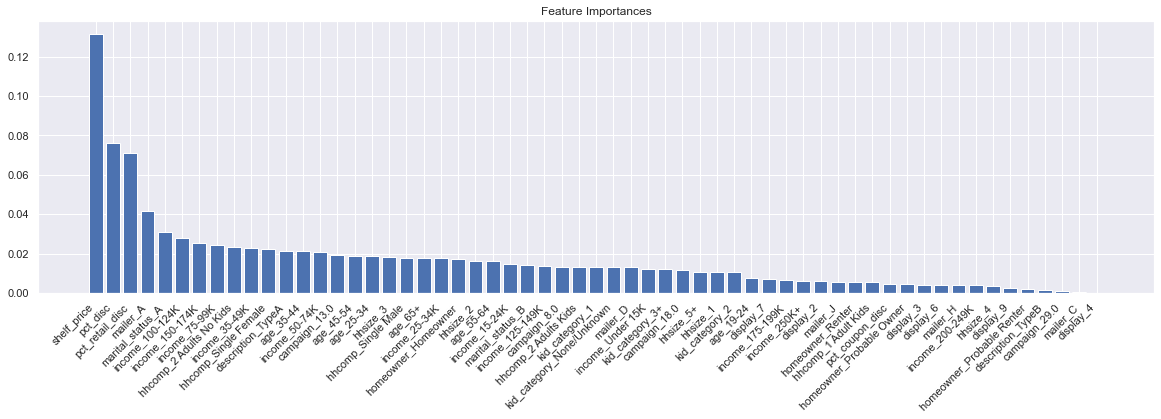

In [35]:
importances_balanced = fav_model_balanced.feature_importances_

indices = np.argsort(importances_balanced)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [X.columns [i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances_balanced[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');
